In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

In [ ]:
print('No of rows:',df.shape[0])
print('nO of columns:',df.shape[1])

No of rows: 1470
nO of columns: 35


237
1233


Text(0, 0.5, 'Number')

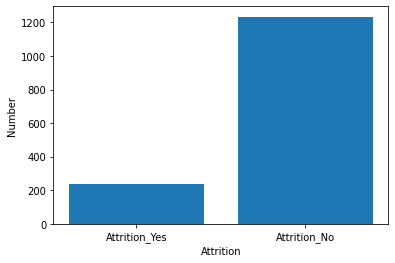

In [ ]:
attrition = df.groupby('Attrition').size()
att_Y=attrition['Yes']
print(att_Y)
att_N=attrition['No']
print(att_N)
x=["Attrition_Yes","Attrition_No"]
y=[att_Y,att_N]
plt.bar(x,y)
plt.xlabel("Attrition")
plt.ylabel("Number")

In [ ]:
final=pd.get_dummies(df)
print(final)

      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2         

In [ ]:
df=pd.concat([df,final],axis=1)
print(df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   BusinessTravel                     1470 non-null   object
 3   DailyRate                          1470 non-null   int64 
 4   Department                         1470 non-null   object
 5   DistanceFromHome                   1470 non-null   int64 
 6   Education                          1470 non-null   int64 
 7   EducationField                     1470 non-null   object
 8   EmployeeCount                      1470 non-null   int64 
 9   EmployeeNumber                     1470 non-null   int64 
 10  EnvironmentSatisfaction            1470 non-null   int64 
 11  Gender                             1470 non-null   object
 12  Hourly

In [ ]:
x=[df.Attrition_Yes]

In [ ]:
df=df.drop(['Attrition_No','Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 82 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [ ]:
X=df.drop(['Attrition_Yes'],axis=1)
Y=df['Attrition_Yes']
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [ ]:
model=DecisionTreeClassifier(min_samples_leaf=100)
model=model.fit(x_train,y_train)
accuracy=model.score(x_test,y_test)
print(accuracy)

0.8231292517006803


In [ ]:
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[98 23]
 [17  9]]
